In [1]:
using DelimitedFiles

In [2]:
covidbycountry = DelimitedFiles.readdlm("who_covid_trans.csv",',',header=false);

In [3]:
#? writedlm

In [4]:
covidbycountry

115×213 Array{Any,2}:
 "Date"             "China"       "Singapore"  …   "Mauritania"    "Comoros"
 "1/21/2020"     278             0                0               0         
 "1/22/2020"     309             0                0               0         
 "1/23/2020"     571             0                0               0         
 "1/24/2020"     830             1                0               0         
 "1/25/2020"    1297             3             …  0               0         
 "1/26/2020"    1985             3                0               0         
 "1/27/2020"    2741             4                0               0         
 "1/28/2020"    4537             7                0               0         
 "1/29/2020"    5997             7                0               0         
 "1/30/2020"    7736            10             …  0               0         
 "1/31/2020"    9720            13                0               0         
 "02/01/2020"  11821            16                0   

In [5]:
namesofcolums = covidbycountry[1,:]

213-element Array{Any,1}:
 "Date"             
 "China"            
 "Singapore"        
 "Japan"            
 "Republic of Korea"
 "Philippines"      
 "Australia"        
 "Malaysia"         
 "New Zealand"      
 "Vietnam"          
 "Brunei Darussalam"
 "Cambodia"         
 "Mongolia"         
 ⋮                  
 "South Sudan"      
 "Malawi"           
 "Eritrea"          
 "Angola"           
 "Zimbabwe"         
 "Botswana"         
 "Burundi"          
 "Gambia"           
 "Namibia"          
 "Seychelles"       
 "Mauritania"       
 "Comoros"          

In [43]:
function getindexbycountryname(name::String)
    for i in 1:length(namesofcolums)
        if lowercase(name) == lowercase(namesofcolums[i])
            return i
        end
    end
end

getindexbycountryname (generic function with 1 method)

In [47]:
getindexbycountryname("Mexico")

119

In [10]:
covidbycountry = covidbycountry[2:end,:];

In [11]:
col1 = covidbycountry[:,1]

114-element Array{Any,1}:
 "1/21/2020" 
 "1/22/2020" 
 "1/23/2020" 
 "1/24/2020" 
 "1/25/2020" 
 "1/26/2020" 
 "1/27/2020" 
 "1/28/2020" 
 "1/29/2020" 
 "1/30/2020" 
 "1/31/2020" 
 "02/01/2020"
 "02/02/2020"
 ⋮           
 "05/02/2020"
 "05/03/2020"
 "05/04/2020"
 "05/05/2020"
 "05/06/2020"
 "05/07/2020"
 "05/08/2020"
 "05/09/2020"
 "05/10/2020"
 "05/11/2020"
 "05/12/2020"
 "5/13/2020" 

In [12]:
using Dates

In [13]:
for i in 1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "m/d/y")
end

In [14]:
col1

114-element Array{Any,1}:
 2020-01-21T00:00:00
 2020-01-22T00:00:00
 2020-01-23T00:00:00
 2020-01-24T00:00:00
 2020-01-25T00:00:00
 2020-01-26T00:00:00
 2020-01-27T00:00:00
 2020-01-28T00:00:00
 2020-01-29T00:00:00
 2020-01-30T00:00:00
 2020-01-31T00:00:00
 2020-02-01T00:00:00
 2020-02-02T00:00:00
 ⋮                  
 2020-05-02T00:00:00
 2020-05-03T00:00:00
 2020-05-04T00:00:00
 2020-05-05T00:00:00
 2020-05-06T00:00:00
 2020-05-07T00:00:00
 2020-05-08T00:00:00
 2020-05-09T00:00:00
 2020-05-10T00:00:00
 2020-05-11T00:00:00
 2020-05-12T00:00:00
 2020-05-13T00:00:00

In [15]:
dayssince(x) = Dates.datetime2rata(col1[length(col1)]) - Dates.datetime2rata(x)

dayssince (generic function with 1 method)

In [16]:
epidays = Array{Int64}(undef,length(col1));

In [17]:
for i = 1:length(col1)
    epidays[i] = abs(dayssince(col1[i]))
end

In [18]:
epidays = epidays[end:-1:1,end:-1:1];

In [19]:
epidays

114×1 Array{Int64,2}:
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
   ⋮
 102
 103
 104
 105
 106
 107
 108
 109
 110
 111
 112
 113

In [36]:
covidbycountry[:,1] = epidays;

114×1 Array{Int64,2}:
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
   ⋮
 102
 103
 104
 105
 106
 107
 108
 109
 110
 111
 112
 113

In [41]:
row,col =size(covidbycountry)
for j = 1:col
    for i = 1:row
        covidbycountry[i,j] = Int(covidbycountry[i,j])
    end
end

In [38]:
covidbycountry = convert(Array{Int64,2},covidbycountry);

114×213 Array{Int64,2}:
   0    278      0      1      1      0  …   0   0   0   0   0   0   0  0   0
   1    309      0      1      1      0      0   0   0   0   0   0   0  0   0
   2    571      0      1      1      0      0   0   0   0   0   0   0  0   0
   3    830      1      1      2      0      0   0   0   0   0   0   0  0   0
   4   1297      3      3      2      0      0   0   0   0   0   0   0  0   0
   5   1985      3      3      2      0  …   0   0   0   0   0   0   0  0   0
   6   2741      4      4      4      0      0   0   0   0   0   0   0  0   0
   7   4537      7      6      4      0      0   0   0   0   0   0   0  0   0
   8   5997      7      7      4      0      0   0   0   0   0   0   0  0   0
   9   7736     10     11      4      1      0   0   0   0   0   0   0  0   0
  10   9720     13     14     11      1  …   0   0   0   0   0   0   0  0   0
  11  11821     16     17     12      1      0   0   0   0   0   0   0  0   0
  12  14411     18     20     15      2 

In [20]:
#using Pkg
#Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [21]:
using Plots

┌ Info: Recompiling stale cache file /Users/eddie/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


In [22]:
gr()

Plots.GRBackend()

In [27]:
covidbycountry[:,119]

5

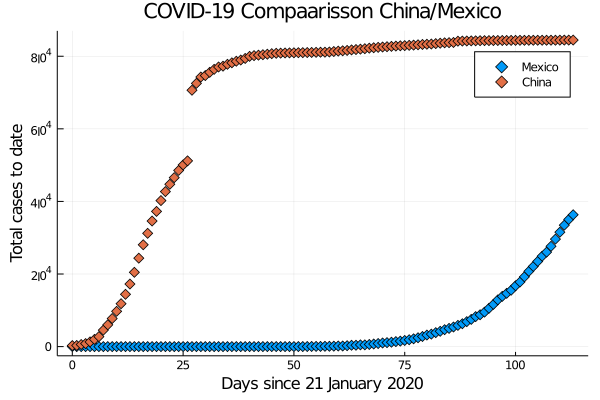

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [42]:
plot(covidbycountry[:,1],[covidbycountry[:,119] covidbycountry[:,2]],linetype= :scatter, 
    marker= (:diamond,5),
    title = "COVID-19 Compaarisson China/Mexico",
    xlabel = "Days since 21 January 2020",
    ylabel = "Total cases to date",
    label = ["Mexico" "China"]
)